In [5]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# Load CSV
df = pd.read_csv(r"C:\Users\Sudharshan.A\Downloads\JultoDec weather_price merged.csv")

# Display column names to verify
print("Original columns:", df.columns.tolist())

# Rename columns for easy access
df.rename(columns={
    'temperature_2m_in degreesC': 'temperature',
    'precipitation_mm': 'precipitation',
    'wind_speed_10m_in km per h': 'wind_speed',
    'relative_humidity_2m_percentage': 'humidity',
    'Price_in Euro per MWh': 'price'
}, inplace=True)

# Convert 'time' to datetime
df['time'] = pd.to_datetime(df['time'])

# Set time as index
df.set_index('time', inplace=True)


Original columns: ['time', 'temperature_2m_in degreesC', 'precipitation_mm', 'wind_speed_10m_in km per h', 'relative_humidity_2m_percentage', 'Price_in Euro per MWh']


In [11]:
# Daily average for smoother plots
daily_df = df.resample('D').mean()
daily_df.head()


,temperature,precipitation,wind_speed,humidity,price
time,,,,,
2024-07-01,12.500000,0.675000,3.529167,94.208333,85.829167
2024-07-02,9.841667,0.050000,3.045833,89.833333,79.970000
2024-07-03,10.287500,0.091667,4.516667,86.500000,80.355833
2024-07-04,11.604167,0.037500,7.720833,69.958333,49.728750
2024-07-05,15.383333,0.000000,5.100000,74.500000,36.318750


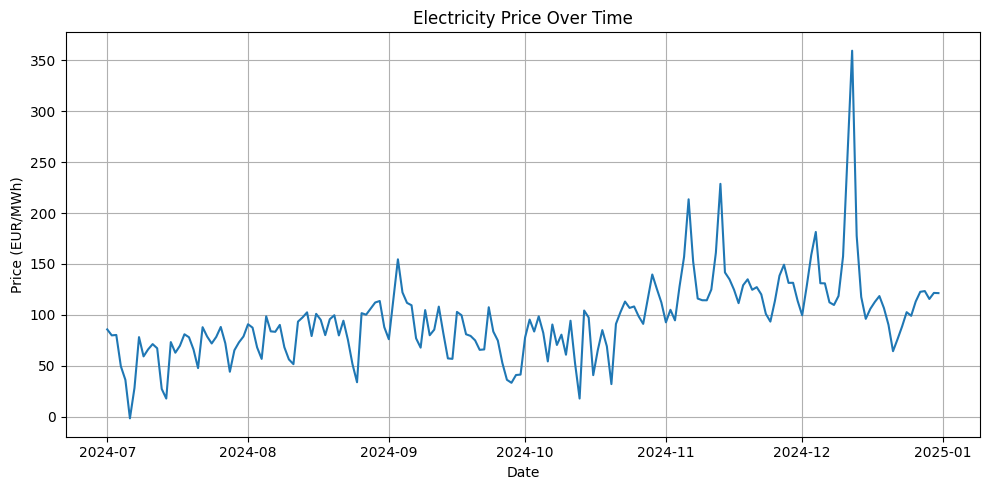

In [12]:
# 1. Electricity Price Over Time
plt.figure(figsize=(10, 5))
plt.plot(daily_df.index, daily_df['price'], label='Price (EUR/MWh)', color='tab:blue')
plt.title('Electricity Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (EUR/MWh)')
plt.grid(True)
plt.tight_layout()
plt.show()

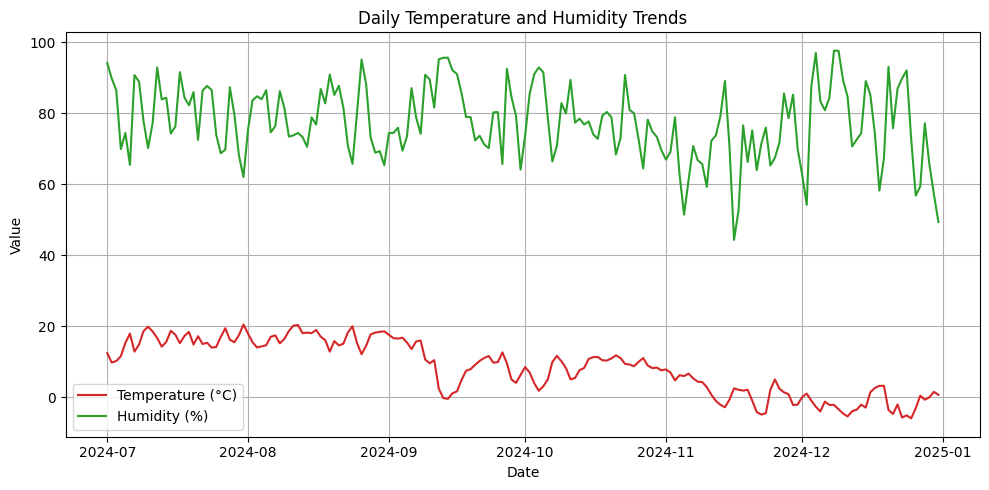

In [13]:
# 2. Daily Temperature and Humidity Trends
plt.figure(figsize=(10, 5))
plt.plot(daily_df.index, daily_df['temperature'], label='Temperature (°C)', color='tab:red')
plt.plot(daily_df.index, daily_df['humidity'], label='Humidity (%)', color='tab:green')
plt.title('Daily Temperature and Humidity Trends')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

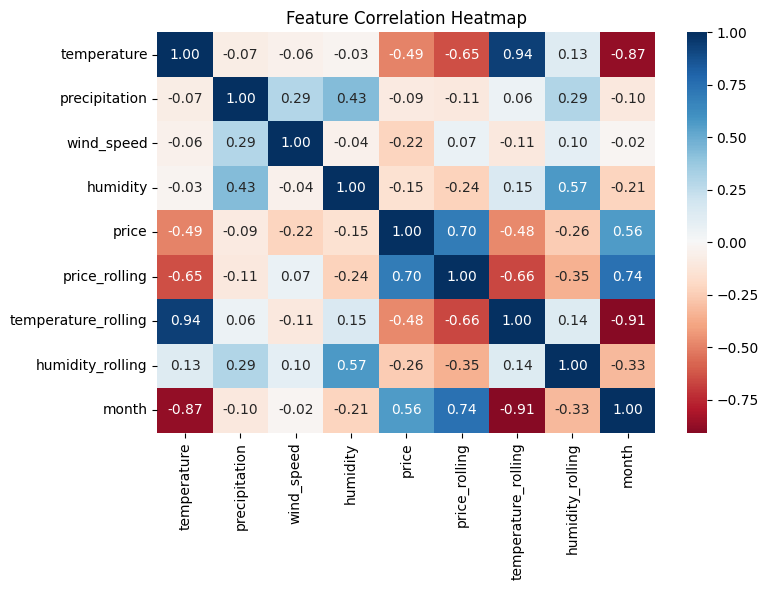

In [22]:
# 3. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(daily_df.corr(), annot=True, fmt='.2f', cmap='RdBu', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

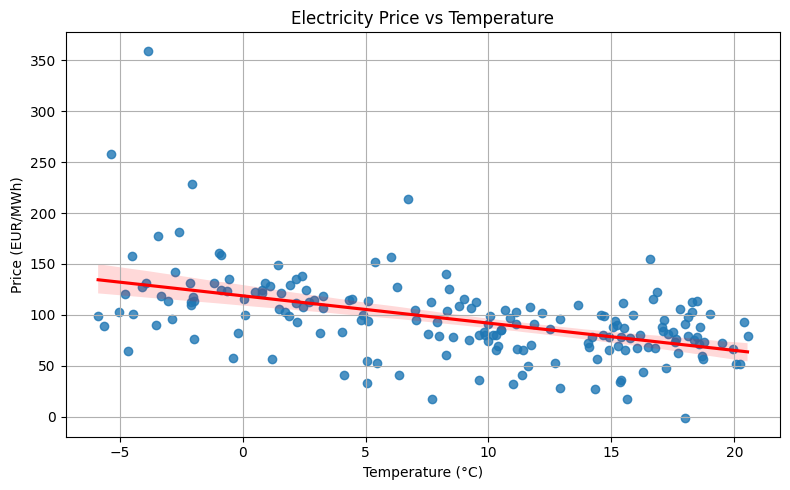

In [18]:
# 4. Price vs Temperature Scatterplot with Trendline
plt.figure(figsize=(8, 5))
sns.regplot(data=daily_df, x='temperature', y='price', line_kws={"color": "red"})
plt.title('Electricity Price vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Price (EUR/MWh)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
# 5. 7-day Rolling Averages
daily_df['price_rolling'] = daily_df['price'].rolling(7).mean()
daily_df['temperature_rolling'] = daily_df['temperature'].rolling(7).mean()
daily_df['humidity_rolling'] = daily_df['humidity'].rolling(7).mean()
daily_df['month'] = daily_df.index.month

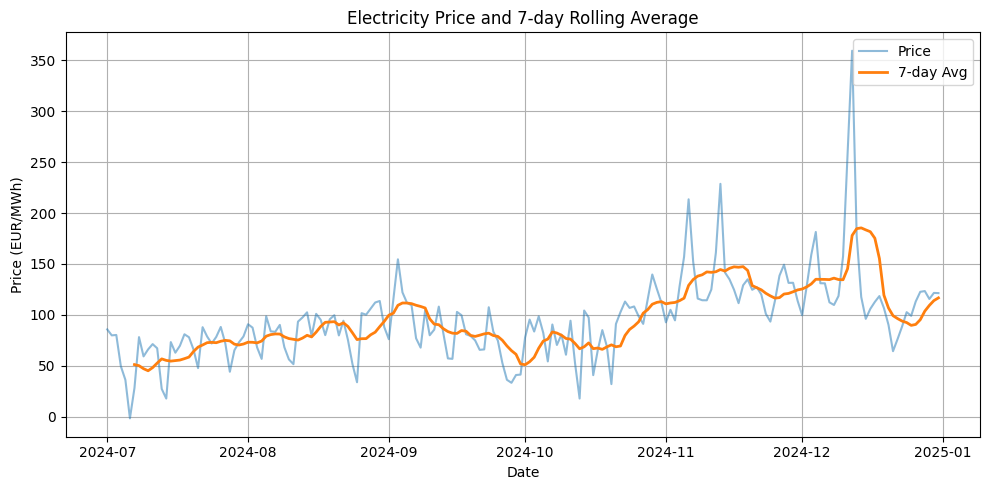

In [20]:
# 6. Electricity Price and 7-day Rolling Average
plt.figure(figsize=(10, 5))
plt.plot(daily_df.index, daily_df['price'], label='Price', color='tab:blue', alpha=0.5)
plt.plot(daily_df.index, daily_df['price_rolling'], label='7-day Avg', color='tab:orange', linewidth=2)
plt.title('Electricity Price and 7-day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Price (EUR/MWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Electricity prices sourced from https://transparency.entsoe.eu/
# Weather data sourced from https://open-meteo.com/
# Sourced file were reformatted for the analysis
# Range of dates used for analysis: 01July2024 to 31December2024
# Analysis done for "10YAT-APG------L"	Austria (AT)